In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

1) Положите в переменную na_number серию, в которой для каждой колонки указано сколько ячеек содержат пропущенные значения.

In [2]:
# Data for the dataframe
data = {
    'client_id': [0, 1, 2, 2, 3],
    'sex': [None, 1.0, None, None, 0.0],
    'wealth': ['medium', 'high', 'medium', 'low', 'high'],
    'age': ['58', '55', '46', '23', '44']
}

# Create the dataframe
df = pd.DataFrame(data)

# Show the dataframe
df

,client_id,sex,wealth,age
0,0,NaN,medium,58
1,1,1.0,high,55
2,2,NaN,medium,46
3,2,NaN,low,23
4,3,0.0,high,44


In [3]:
na_number = df.isna().sum()
na_number

client_id    0
sex          3
wealth       0
age          0
dtype: int64

2) Сохраните в переменную df_types типы данных каждой колонки датафрэйма df.

In [4]:
df_types = df.dtypes
df_types

client_id      int64
sex          float64
wealth        object
age           object
dtype: object

3) Внезапно оказалось, что в переменной age значения хранятся в виде строк! Поменяйте тип значений на целочисленный в этой колонке датафрэйма df.

In [5]:
df = df.astype({'age': 'int'})
# df['age'] = df['age'].astype('int')
df.dtypes

client_id      int64
sex          float64
wealth        object
age            int32
dtype: object

4) Как выяснилось, для дальнейшего анализа нам не понадобятся колонки sex и age – удалите их из датафрэйма.

In [6]:
df.drop(columns=['age', 'sex'], inplace=True)
#df.drop(['age', 'sex'], axis=1, inplace=True) # axis=0 для строк
df

,client_id,wealth
0,0,medium
1,1,high
2,2,medium
3,2,low
4,3,high


5) А теперь проверим, есть ли в нашей таблице df дубликаты по полю client_id – дропните все строки, в которых значения в колонке client_id повторяются.

In [7]:
df.drop_duplicates(subset=['client_id'], inplace=True)
df

,client_id,wealth
0,0,medium
1,1,high
2,2,medium
4,3,high


6) Сохраните данные, находящиеся по ссылке https://stepik.org/media/attachments/lesson/359240/taxi_peru.csv, в переменную taxi, разделитель – ;.
Затем приведите столбцы start_at, end_at, arrived_at к формату даты.
Отфильтруйте данные и оставьте наблюдения со статусом заказа "asap" и "reserved" (start_type).

In [8]:
taxi = pd.read_csv('https://stepik.org/media/attachments/lesson/359240/taxi_peru.csv', parse_dates= ['start_at', 'end_at', 'arrived_at'], sep=';')
taxi

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23106,4a18ea5737ce0ffecaf20b305a0e2c86,8998bb370b5f0cec43a373adebba0c72,d665fb9f75ef5d9cd0fd89479380ba78,16cbe35db7fff70fbc8251b4cda9fdc9,executive,reserved,2010-07-31 13:15:00,"-12,08974075","-77,04699707",2010-07-31 13:27:00,"-12,08352661","-77,05044556",drop off,"-12,08973527","-77,04787016",2010-07-31 13:15:00,iPhone,5.0,5.0
23107,f1e4317f2c17991dd90d1cd17ae0d399,5f8a6ffef0ea5df78a8ee890267b60ec,17c21284245ff240c7212732991c2373,716a697375634f32a06d692b0448f13d,executive,asap,2010-10-02 05:26:00,"-12,09253011","-77,02875271",2010-10-02 05:56:00,"-12,07776001","-77,05623798",drop off,"-12,10639693","-77,04028948",2010-10-02 05:39:00,Android,NaN,5.0
23108,1e44c0fd0a266c3719ff30410b257bce,c0ffb6f6cd801004dd8609c12277c2d1,4851ee4c867c9b49b909c1adb76c31e9,4851ee4c867c9b49b909c1adb76c538e,executive,asap,2010-09-21 09:56:00,"-12,1275637","-77,02642288",2010-09-21 10:18:00,"-12,10529838","-77,04735249",drop off,"-12,12605017","-77,01882491",2010-09-21 10:05:00,Android,0.0,0.0
23109,7073883383b89ad289e864022150cdd7,c0ffb6f6cd801004dd8609c12277c2d1,56f59b58bcbbd1cdabc3652e713134c2,924d4f0e7554566623e8ebb3904a7b0c,executive,reserved,2010-04-29 04:30:00,"-12,019468","-77,1077669",2010-04-29 05:11:00,"-12,09909987","-77,03475013",drop off,"-12,0710933","-77,09855131",2010-04-29 04:23:00,Android,NaN,5.0


In [9]:
# taxi['start_at'] = pd.to_datetime(taxi.start_at)
# taxi[['start_at', 'end_at', 'arrived_at']]= taxi[['start_at', 'end_at', 'arrived_at']].apply(pd.to_datetime)

In [10]:
taxi.dtypes

journey_id                  object
user_id                     object
driver_id                   object
taxi_id                     object
icon                        object
start_type                  object
start_at            datetime64[ns]
start_lat                   object
start_lon                   object
end_at              datetime64[ns]
end_lat                     object
end_lon                     object
end_state                   object
driver_start_lat            object
driver_start_lon            object
arrived_at          datetime64[ns]
source                      object
driver_score               float64
rider_score                float64
dtype: object

In [11]:
taxi.query('(start_type == "asap") or (start_type == "reserved")')

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23106,4a18ea5737ce0ffecaf20b305a0e2c86,8998bb370b5f0cec43a373adebba0c72,d665fb9f75ef5d9cd0fd89479380ba78,16cbe35db7fff70fbc8251b4cda9fdc9,executive,reserved,2010-07-31 13:15:00,"-12,08974075","-77,04699707",2010-07-31 13:27:00,"-12,08352661","-77,05044556",drop off,"-12,08973527","-77,04787016",2010-07-31 13:15:00,iPhone,5.0,5.0
23107,f1e4317f2c17991dd90d1cd17ae0d399,5f8a6ffef0ea5df78a8ee890267b60ec,17c21284245ff240c7212732991c2373,716a697375634f32a06d692b0448f13d,executive,asap,2010-10-02 05:26:00,"-12,09253011","-77,02875271",2010-10-02 05:56:00,"-12,07776001","-77,05623798",drop off,"-12,10639693","-77,04028948",2010-10-02 05:39:00,Android,NaN,5.0
23108,1e44c0fd0a266c3719ff30410b257bce,c0ffb6f6cd801004dd8609c12277c2d1,4851ee4c867c9b49b909c1adb76c31e9,4851ee4c867c9b49b909c1adb76c538e,executive,asap,2010-09-21 09:56:00,"-12,1275637","-77,02642288",2010-09-21 10:18:00,"-12,10529838","-77,04735249",drop off,"-12,12605017","-77,01882491",2010-09-21 10:05:00,Android,0.0,0.0
23109,7073883383b89ad289e864022150cdd7,c0ffb6f6cd801004dd8609c12277c2d1,56f59b58bcbbd1cdabc3652e713134c2,924d4f0e7554566623e8ebb3904a7b0c,executive,reserved,2010-04-29 04:30:00,"-12,019468","-77,1077669",2010-04-29 05:11:00,"-12,09909987","-77,03475013",drop off,"-12,0710933","-77,09855131",2010-04-29 04:23:00,Android,NaN,5.0


7) Создайте колонку wait_time, в которой будет храниться разница между временем подачи машины (arrived_at) и временем заказа (start_at) в минутах.

In [12]:
taxi['wait_time'] = (taxi['arrived_at'] - taxi['start_at']).dt.total_seconds() / 60 # тк поддержка .astype('timedelta64[m]') прекращена

taxi

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,wait_time
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0,18.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0,-5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23106,4a18ea5737ce0ffecaf20b305a0e2c86,8998bb370b5f0cec43a373adebba0c72,d665fb9f75ef5d9cd0fd89479380ba78,16cbe35db7fff70fbc8251b4cda9fdc9,executive,reserved,2010-07-31 13:15:00,"-12,08974075","-77,04699707",2010-07-31 13:27:00,"-12,08352661","-77,05044556",drop off,"-12,08973527","-77,04787016",2010-07-31 13:15:00,iPhone,5.0,5.0,0.0
23107,f1e4317f2c17991dd90d1cd17ae0d399,5f8a6ffef0ea5df78a8ee890267b60ec,17c21284245ff240c7212732991c2373,716a697375634f32a06d692b0448f13d,executive,asap,2010-10-02 05:26:00,"-12,09253011","-77,02875271",2010-10-02 05:56:00,"-12,07776001","-77,05623798",drop off,"-12,10639693","-77,04028948",2010-10-02 05:39:00,Android,NaN,5.0,13.0
23108,1e44c0fd0a266c3719ff30410b257bce,c0ffb6f6cd801004dd8609c12277c2d1,4851ee4c867c9b49b909c1adb76c31e9,4851ee4c867c9b49b909c1adb76c538e,executive,asap,2010-09-21 09:56:00,"-12,1275637","-77,02642288",2010-09-21 10:18:00,"-12,10529838","-77,04735249",drop off,"-12,12605017","-77,01882491",2010-09-21 10:05:00,Android,0.0,0.0,9.0
23109,7073883383b89ad289e864022150cdd7,c0ffb6f6cd801004dd8609c12277c2d1,56f59b58bcbbd1cdabc3652e713134c2,924d4f0e7554566623e8ebb3904a7b0c,executive,reserved,2010-04-29 04:30:00,"-12,019468","-77,1077669",2010-04-29 05:11:00,"-12,09909987","-77,03475013",drop off,"-12,0710933","-77,09855131",2010-04-29 04:23:00,Android,NaN,5.0,-7.0


8) Посмотрим, какие водители опаздывали на заказы к определенному времени (start_type == 'reserved'). Опозданием считается время ожидания wait_time > 0.0.
Сгруппируйте отфильтрованные данные по driver_id и в качестве ответа укажите id водителя, который опоздал на заказ интересующего нас типа наибольшее число раз.

In [13]:
# taxi\
#  .query('(start_type == "reserved") and (wait_time > 0)')\
#  .groupby('driver_id')\
#  .agg({'driver_id':  'count'})\
#  .idxmax()

taxi\
    .query('(start_type == "reserved") and (wait_time > 0)')\
    .driver_id.value_counts()\
    .idxmax()

'406921adcca37705ef527b4246c0cfea'

9) Добавьте столбец month, где будет храниться месяц, в котором был сделан заказ (start_at), как номер, и столбец weekday – название дня недели.

In [14]:
taxi['month'] = taxi.start_at.dt.month
taxi['weekday'] = taxi.start_at.dt.day_name()

10) Постройте график числа заказов по месяцам (month). Подумайте, с чем может быть связана полученная картина.
Вопрос: в каком летнем месяце было сделано наименьшее число заказов?

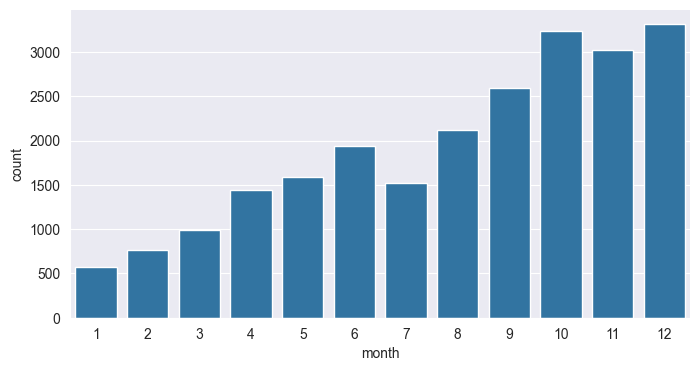

In [23]:
plt.figure(figsize=(8, 4))
sns.countplot(data=taxi, x=taxi.month)
sns.despine()

Ответ: Летом меньше заказов в июле (вероятно из-за отпусков и отъезда на дачу).

11. А теперь – график по дням недели (weekday). Задать порядок столбиков на графике можно с помощью аргумента order, которому нужно передать список названий в нужном порядке.
Вопрос: в какой день недели суммарно поступило меньше всего заказов?

<Axes: xlabel='weekday', ylabel='count'>

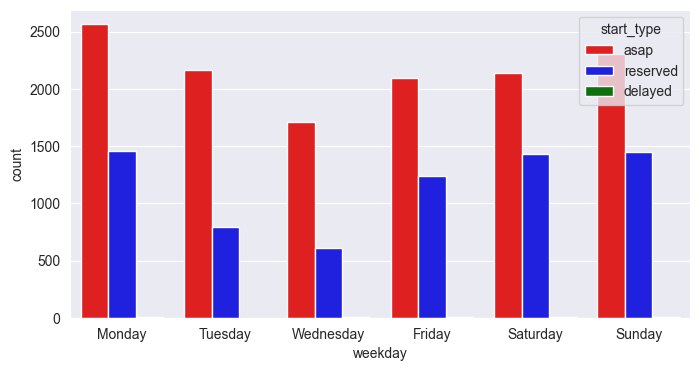

In [25]:
plt.figure(figsize=(8, 4))
order=['Monday', 'Tuesday', 'Wednesday', 'Tuesday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(
                data= taxi,
                x=taxi.weekday,
                hue=taxi.start_type,
                order=order,
                palette=['red', 'blue', 'green']
            )

Ответ: в среду суммарно поступило меньше всего заказов.

12. Также мы можем посмотреть на несколько простых метрик, показывающих число уникальных пользователей за определённый период:
DAU (daily active users) – число уникальных пользователей за день
WAU (weekly active users) – число уникальных пользователей за неделю
MAU (monthly active users) – число уникальных пользователей за месяц
Активные пользователи – те, кто воспользовался приложением и сделал хотя бы один заказ за выбранный промежуток времени.
Постройте график MAU.

In [35]:
mau = taxi\
    .groupby('month')\
    .agg({'user_id': pd.Series.nunique})
mau

,user_id
month,
1,102
2,111
3,163
4,254
5,275
6,309
7,318
8,377
9,416


C:\Users\R\AppData\Local\Temp\ipykernel_4664\3306453975.py:2: UserWarning: The markers list has more values (2) than needed (1), which may not be intended.
  sns.lineplot(data=mau, markers='o-')


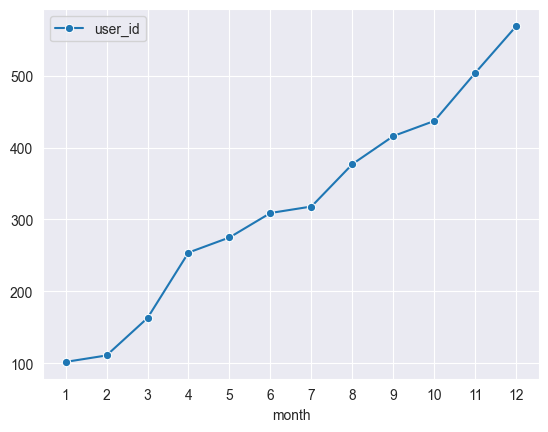

In [39]:
xticks = list(range(1, 13, 1))
sns.lineplot(data=mau, markers='o-')
plt.xticks(xticks)
plt.show()